In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.lines import Line2D
import numpy as np
import dateutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [75]:
metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv', index_col = 0)
tf = pd.read_csv(r'..\data\interim\tf_raw_cleaned_metimp_imputed.csv', index_col=0)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired',
                            1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [21]:
tf

,20210831_KAO_HILIC_human_plasma_1,20210831_KAO_HILIC_human_plasma_2,20210831_KAO_HILIC_human_plasma_3,20210831_KAO_HILIC_human_plasma_4,20210831_KAO_HILIC_human_plasma_5,20210831_KAO_HILIC_T112M_20210330_8wk_RBG,20210831_KAO_HILIC_T193M20210406_9wk_RBG,20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,...,20210831_KAO_HILIC_T1101M_20210330_8wk_RBG,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG
Acetylcarnitine,1.349962e+07,1.404424e+07,1.492806e+07,1.539900e+07,1.521926e+07,4.739158e+07,5.838071e+07,6.624380e+07,3.289923e+07,8.987697e+07,...,6.432679e+07,1.091273e+08,4.887379e+07,9.528825e+07,4.608676e+07,9.900185e+07,1.139366e+08,4.859275e+07,1.008235e+08,3.999592e+07
Adenosine monophosphate,1.963570e+04,3.692582e+04,4.362813e+04,3.405041e+04,6.487562e+04,8.420195e+05,9.415530e+05,9.451418e+05,2.060971e+06,1.222598e+06,...,8.581720e+05,6.735501e+05,5.008835e+05,1.050453e+06,6.701419e+05,1.585914e+06,9.586290e+05,1.138970e+06,9.379053e+05,6.459837e+05
Cytidine diphosphocholine,1.131334e+04,2.125439e+04,2.530040e+04,8.856137e+03,9.318881e+03,8.799017e+04,1.107547e+05,1.485913e+04,6.410624e+04,6.580410e+04,...,1.025005e+05,9.616181e+04,8.103071e+04,6.554153e+04,4.435573e+04,8.352248e+04,6.711154e+04,1.001121e+05,3.479394e+04,8.500627e+04
Carnitine,4.297005e+07,4.334441e+07,4.829602e+07,5.240810e+07,5.267576e+07,4.334099e+07,5.388820e+07,1.623391e+07,4.052204e+07,2.626584e+07,...,3.096028e+07,2.638775e+07,3.865248e+07,3.173582e+07,2.781915e+07,3.184427e+07,2.552895e+07,4.506856e+07,3.472707e+07,3.195679e+07
Glutamine,1.978960e+08,1.354963e+08,1.406791e+08,1.474824e+08,1.637729e+08,1.137500e+08,1.299708e+08,1.219882e+08,1.217607e+08,1.195326e+08,...,1.212516e+08,1.100904e+08,1.150889e+08,1.261100e+08,9.787143e+07,1.414438e+08,1.203286e+08,1.271040e+08,1.329792e+08,1.034570e+08
Leucine/Isoleucine,2.702475e+07,4.882924e+07,5.641684e+07,6.043672e+07,6.304485e+07,1.141596e+08,5.602798e+07,2.544579e+07,7.298654e+07,4.092009e+07,...,8.907146e+07,4.219667e+07,1.003835e+08,4.420046e+07,7.374786e+07,3.402026e+07,2.503039e+07,1.079708e+08,3.225403e+07,8.078642e+07
Lysine,8.739398e+06,9.202445e+06,9.160722e+06,9.634483e+06,8.930613e+06,1.616747e+07,1.620911e+07,1.313195e+07,1.425359e+07,1.314339e+07,...,1.364110e+07,1.189479e+07,1.608287e+07,1.493136e+07,1.697843e+07,1.162575e+07,1.166529e+07,1.483510e+07,1.152360e+07,1.337999e+07
Proline,2.072207e+07,2.576817e+07,2.816225e+07,3.008535e+07,3.099806e+07,2.051620e+07,1.788221e+07,1.235534e+07,1.926976e+07,1.248642e+07,...,1.542647e+07,8.963145e+06,1.953582e+07,1.083866e+07,1.499437e+07,1.087277e+07,8.706379e+06,1.971799e+07,1.287038e+07,1.482348e+07
Glycine,1.284400e+06,8.038567e+05,9.217551e+05,8.897078e+05,1.027541e+06,1.898159e+06,2.210883e+06,1.837123e+06,2.335518e+06,2.138974e+06,...,1.863427e+06,2.304484e+06,1.849469e+06,2.563582e+06,1.717130e+06,1.970609e+06,1.730554e+06,2.297562e+06,2.448366e+06,1.766916e+06
Guanosine,1.229769e+06,7.790640e+05,7.775158e+05,9.064964e+05,1.039392e+06,4.769341e+05,5.274255e+05,4.405407e+05,1.836359e+06,8.895021e+05,...,8.038893e+05,5.025057e+05,7.653137e+05,5.399007e+05,7.623500e+05,5.681028e+05,4.058541e+05,1.028787e+06,5.030360e+05,7.587902e+05


In [11]:
quant_files = metab_file_grouping[metab_file_grouping['quant_file']]['File Name']

In [13]:
df

,X20210831_KAO_HILIC_human_plasma_1,X20210831_KAO_HILIC_human_plasma_2,X20210831_KAO_HILIC_human_plasma_3,X20210831_KAO_HILIC_human_plasma_4,X20210831_KAO_HILIC_human_plasma_5,X20210831_KAO_HILIC_T112M_20210330_8wk_RBG,X20210831_KAO_HILIC_T193M20210406_9wk_RBG,X20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,X20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,X20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,...,X20210831_KAO_HILIC_T1101M_20210330_8wk_RBG,X20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,X20210831_KAO_HILIC_T1101M_20210406_9wk_RBG,X20210831_KAO_HILIC_T1101M_20210410_10wk_FBG,X20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,X20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,X20210831_KAO_HILIC_T1102M_20210402_9wk_FBG,X20210831_KAO_HILIC_T1102M_20210406_9wk_RBG,X20210831_KAO_HILIC_T1102M_20210410_10wk_FBG,X20210831_KAO_HILIC_T1102M_20210413_10wk_RBG
Acetylcarnitine,1.349962e+07,1.404424e+07,1.492806e+07,1.539900e+07,1.521926e+07,4.739158e+07,5.838071e+07,6.624380e+07,3.289923e+07,8.987697e+07,...,6.432679e+07,1.091273e+08,4.887379e+07,9.528825e+07,4.608676e+07,9.900185e+07,1.139366e+08,4.859275e+07,1.008235e+08,3.999592e+07
Adenosine monophosphate,1.963570e+04,3.692582e+04,4.362813e+04,3.405041e+04,6.487562e+04,8.420195e+05,9.415530e+05,9.451418e+05,2.060971e+06,1.222598e+06,...,8.581720e+05,6.735501e+05,5.008835e+05,1.050453e+06,6.701419e+05,1.585914e+06,9.586290e+05,1.138970e+06,9.379053e+05,6.459837e+05
Cytidine diphosphocholine,1.131334e+04,2.125439e+04,2.530040e+04,8.856137e+03,9.318881e+03,8.799017e+04,1.107547e+05,1.485913e+04,6.410624e+04,6.580410e+04,...,1.025005e+05,9.616181e+04,8.103071e+04,6.554153e+04,4.435573e+04,8.352248e+04,6.711154e+04,1.001121e+05,3.479394e+04,8.500627e+04
Carnitine,4.297005e+07,4.334441e+07,4.829602e+07,5.240810e+07,5.267576e+07,4.334099e+07,5.388820e+07,1.623391e+07,4.052204e+07,2.626584e+07,...,3.096028e+07,2.638775e+07,3.865248e+07,3.173582e+07,2.781915e+07,3.184427e+07,2.552895e+07,4.506856e+07,3.472707e+07,3.195679e+07
Glutamine,1.978960e+08,1.354963e+08,1.406791e+08,1.474824e+08,1.637729e+08,1.137500e+08,1.299708e+08,1.219882e+08,1.217607e+08,1.195326e+08,...,1.212516e+08,1.100904e+08,1.150889e+08,1.261100e+08,9.787143e+07,1.414438e+08,1.203286e+08,1.271040e+08,1.329792e+08,1.034570e+08
Leucine/Isoleucine,2.702475e+07,4.882924e+07,5.641684e+07,6.043672e+07,6.304485e+07,1.141596e+08,5.602798e+07,2.544579e+07,7.298654e+07,4.092009e+07,...,8.907146e+07,4.219667e+07,1.003835e+08,4.420046e+07,7.374786e+07,3.402026e+07,2.503039e+07,1.079708e+08,3.225403e+07,8.078642e+07
Lysine,8.739398e+06,9.202445e+06,9.160722e+06,9.634483e+06,8.930613e+06,1.616747e+07,1.620911e+07,1.313195e+07,1.425359e+07,1.314339e+07,...,1.364110e+07,1.189479e+07,1.608287e+07,1.493136e+07,1.697843e+07,1.162575e+07,1.166529e+07,1.483510e+07,1.152360e+07,1.337999e+07
Proline,2.072207e+07,2.576817e+07,2.816225e+07,3.008535e+07,3.099806e+07,2.051620e+07,1.788221e+07,1.235534e+07,1.926976e+07,1.248642e+07,...,1.542647e+07,8.963145e+06,1.953582e+07,1.083866e+07,1.499437e+07,1.087277e+07,8.706379e+06,1.971799e+07,1.287038e+07,1.482348e+07
Glycine,1.284400e+06,8.038567e+05,9.217551e+05,8.897078e+05,1.027541e+06,1.898159e+06,2.210883e+06,1.837123e+06,2.335518e+06,2.138974e+06,...,1.863427e+06,2.304484e+06,1.849469e+06,2.563582e+06,1.717130e+06,1.970609e+06,1.730554e+06,2.297562e+06,2.448366e+06,1.766916e+06
Guanosine,1.229769e+06,7.790640e+05,7.775158e+05,9.064964e+05,1.039392e+06,4.769341e+05,5.274255e+05,4.405407e+05,1.836359e+06,8.895021e+05,...,8.038893e+05,5.025057e+05,7.653137e+05,5.399007e+05,7.623500e+05,5.681028e+05,4.058541e+05,1.028787e+06,5.030360e+05,7.587902e+05


In [46]:
metab_file_grouping

,File Name,analytical_order,fixed_filename,qc_file,quant_file,blank_file,animal,week,bg_type
1,20210831_KAO_HILIC_ACN_20210831232610,1,20210831_KAO_HILIC_ACN_20210831232610,False,False,True,NaN,NaN,NaN
2,20210831_KAO_HILIC_extraction_blank_1,2,20210831_KAO_HILIC_extraction_blank_1,False,False,True,NaN,NaN,NaN
3,20210831_KAO_HILIC_extraction_blank_1_20210901...,3,20210831_KAO_HILIC_extraction_blank_1_20210901...,False,False,True,NaN,NaN,NaN
4,20210831_KAO_HILIC_human_plasma_1,4,20210831_KAO_HILIC_human_plasma_1,True,False,False,NaN,NaN,NaN
5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,True,False,1060.0,9.0,RBG
...,...,...,...,...,...,...,...,...,...
64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,False,True,False,1060.0,10.0,RBG
65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,False,True,False,1102.0,8.0,FBG
66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,False,True,False,1074.0,8.0,FBG
67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,False,True,False,1082.0,9.0,RBG


Text(-0.08, 1.03, 'A')

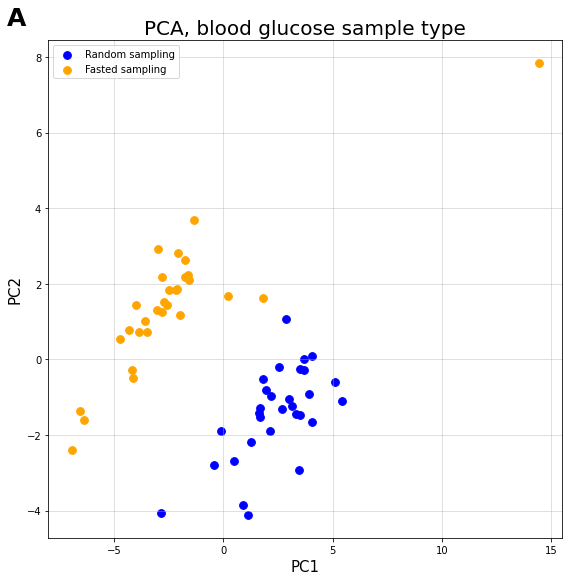

In [60]:
df = tf

pca_data = df[quant_files].T
# display(pca_data.index)

idx = pca_data.index.to_frame()
idx = idx.reset_index().drop(0, axis=1)
# display(idx)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data)
# display(scaled)
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)
fitted = fitted.join(idx)
fitted = fitted.merge(right=metab_file_grouping[['File Name', 'animal', 'bg_type', 'week']],
                      left_on='index',
                      right_on = 'File Name')
# print(pca.get_params())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, blood glucose sample type', fontsize=20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = fitted[(fitted['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['Random sampling', 'Fasted sampling'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

In [73]:
metab_file_grouping

,File Name,analytical_order,fixed_filename,qc_file,quant_file,blank_file,animal,week,bg_type,gluc_tol
1,20210831_KAO_HILIC_ACN_20210831232610,1,20210831_KAO_HILIC_ACN_20210831232610,False,False,True,NaN,NaN,NaN,NaN
2,20210831_KAO_HILIC_extraction_blank_1,2,20210831_KAO_HILIC_extraction_blank_1,False,False,True,NaN,NaN,NaN,NaN
3,20210831_KAO_HILIC_extraction_blank_1_20210901...,3,20210831_KAO_HILIC_extraction_blank_1_20210901...,False,False,True,NaN,NaN,NaN,NaN
4,20210831_KAO_HILIC_human_plasma_1,4,20210831_KAO_HILIC_human_plasma_1,True,False,False,NaN,NaN,NaN,NaN
5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,True,False,1060.0,9.0,RBG,NaN
...,...,...,...,...,...,...,...,...,...,...
64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,64,20210831_KAO_HILIC_T1060M_20210408_10wk_RBG,False,True,False,1060.0,10.0,RBG,NaN
65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,65,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG,False,True,False,1102.0,8.0,FBG,NaN
66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,66,20210831_KAO_HILIC_T1074M_20210322_8wk_FBG,False,True,False,1074.0,8.0,FBG,NaN
67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,67,20210831_KAO_HILIC_T1082M_20210401_9wk_RBG,False,True,False,1082.0,9.0,RBG,NaN


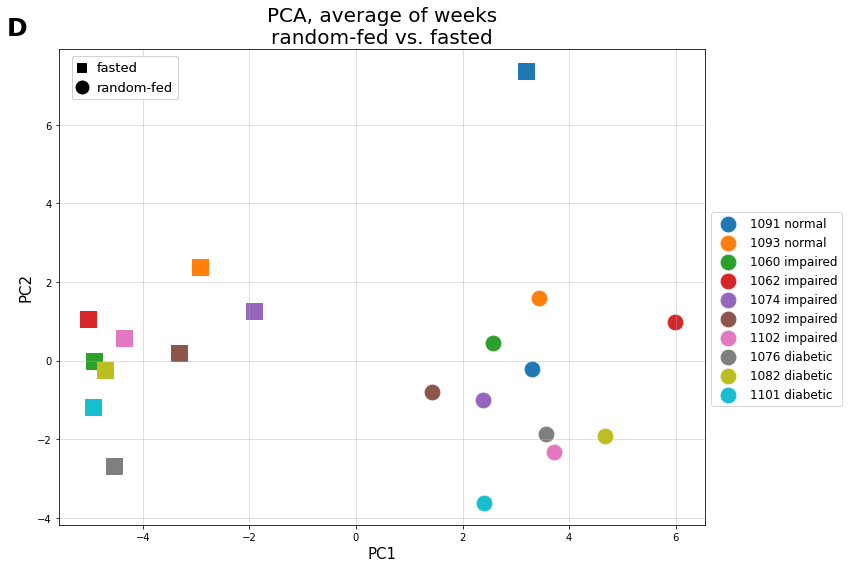

In [105]:
df = tf

animal_avg_df = pd.DataFrame()

for tolerance_type in bg_dict:
    for rat_label in bg_dict[tolerance_type]:
        for bg_type in ['RBG', 'FBG']:
            cols = metab_file_grouping[  (metab_file_grouping['animal'] == rat_label)\
                                 & (metab_file_grouping['bg_type'] == bg_type)\
                                 & (metab_file_grouping['quant_file'] == True )]['File Name']
            animal_avg_df[f'{tolerance_type}_{rat_label}_{bg_type}'] = df[cols].mean(axis=1)
            
pca_data = animal_avg_df.T
pca_data['gluc_tol'] = pca_data.index.str.split('_').str[0]
pca_data['rat_label'] = pca_data.index.str.split('_').str[1]
pca_data['bg_type'] = pca_data.index.str.split('_').str[2]
# display(pca_data)
# 
# pca_data = df[quant_files].T
# display(pca_data.index)

# idx = pca_data.index.to_frame()
# idx = idx.reset_index().drop(0, axis=1)
# display(idx)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label', 'gluc_tol'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label', 'gluc_tol']]], axis=1)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, average of weeks\nrandom-fed vs. fasted', fontsize = 20)

markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

handles = []

for rat_label, color in zip(animals_used, colors):
    for bg_type, marker in zip(['RBG', 'FBG'], markers):
        tolerance_type = animal_to_tolerance_dict[rat_label]
        edge_color = None
        if tolerance_type == 'diabetic':
            edge_color = 'lightgray'
        elif tolerance_type == 'impaired':
            edge_color = 'darkgray'
        else: 
            edge_color = 'black'

        scatter_points = pca_data[(pca_data['gluc_tol'] == tolerance_type) & \
                                  (pca_data['rat_label'] == str(rat_label)) & \
                                  (pca_data['bg_type'] == bg_type)]
        
        handle = ax.scatter(scatter_points['pc1'],
                            scatter_points['pc2'],
                            c = color,
                            marker=marker,
#                             edgecolors=edge_color,
#                             linewidths=3,              # linewidths is stroke size of marker outline
                            s = (250 if marker == 's' else 220),
                            )
#         # Annotate the plot with letter for Diabetic, Normal, Impaired
#         ax.annotate(tolerance_type[0].upper(), 
#                     xy=(scatter_points['pc1']-0.5, scatter_points['pc2']-0.7), 
#                     fontsize=20,
#                     color='black')
    
        # define the text label for the data handle for the legend:
#         gluc_tol = animal_phenotypes[animal_phenotypes['animal'] == rat_label]['glucose_tolerance'].values[0]
        handle.set_label(str(rat_label) + ' ' + tolerance_type )
        handles.append(handle)
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

legend_labels = []
for animal in animals_used:
    animal_data = animal_phenotypes[animal_phenotypes['animal'] == animal]
    gluc_tol = animal_data['glucose_tolerance'].values[0]
    label = str(animal) + ' ' + gluc_tol
    legend_labels.append(label)
    
# Sort legend_labels based on normal/impaired/diabetic substring
# legend_labels.sort(key = lambda x: x.split(' ')[1])

handles, labels = ax.get_legend_handles_labels()

# print(handles, labels)
legend = ax.legend(handles[::2], labels[::2], loc=(1.01, 0.25), fontsize=12)

# legend = ax.legend(labels=legend_labels, loc=(1.01, 0.7))

legend2 = ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='fasted', ),
                   Line2D([0], [0], marker='o', color='white', label='random-fed', 
                          markerfacecolor='black', markersize=15)], loc=(0.02, 0.895), fontsize=13, handlelength=0.7)
ax.add_artist(legend)
ax.add_artist(legend2)

# ax.legend(handles=[mpatches.Rectangle(xy=(0, 0), width=1, height=1, color='black', label='FBG'),
#                    mpatches.Circle(xy=(0, 0), color='black', label='RBG')], loc=(1.01, 0.98))

ax.text(-0.08, 1.03, "D", transform=ax.transAxes, fontsize=25, weight='bold')

plt.tight_layout()

In [ ]:
df = tf

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, blood glucose sample type', fontsize=20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = pca_data[(pca_data['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['Random sampling', 'Fasted sampling'],)
ax.grid(alpha=0.5)
plt.tight_layout()

ax.text(-0.08, 1.03, "A", transform=ax.transAxes, fontsize=25, weight='bold')

# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\PCA colored by BG.png')